# Import Lib

In [1]:
# Code goes here.
#import lib
import numpy as np #numpy
import matplotlib.pylab as plt #matplotlib.pylab
import pandas as pd #pandas
from sklearn.ensemble import RandomForestRegressor #RandomForestRegressor 
from sklearn.neural_network import MLPRegressor #MLPRegressor
from sklearn.svm import SVR #SVR
from sklearn.model_selection import train_test_split, KFold #train_test_split
from sklearn.metrics import mean_absolute_error  #MAE
from sklearn.preprocessing import StandardScaler #preprocessing data
from copy import deepcopy #deepcopy

# Part 1

In [2]:
DATA_PATH_1 = './AlgerianFF_Region1.csv' #AlgerianFF_Region1.csv
DATA_PATH_2 = './AlgerianFF_Region2.csv' #AlgerianFF_Region2.csv
N_SPLITS = 5    # Number of cross validation folds
FEATRURE_COLUMNS = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI'] # features used to train a model
TARGET_COLUMN = 'FWI' # target 
RANDOM_STATE = 42 # random state used
TRAIN_RATIO = 0.8 # the proportion of the dataset to include in the train split

# Task 1.1 of AlgerianFF_Region1

# Data preparation of AlgerianFF_Region1

In [3]:
data_1 = pd.read_csv(DATA_PATH_1)
data_1.columns = [x.strip() for x in data_1.columns]
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 12.5 KB


In [4]:
X, y = data_1[FEATRURE_COLUMNS], data_1[TARGET_COLUMN]
X, y = X.values, y.values
X.shape, y.shape

((122, 9), (122,))

# Preprocess data of AlgerianFF_Region1

In [5]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=RANDOM_STATE, train_size=TRAIN_RATIO)

# Task 1.3 MAE implementation

In [6]:
def train(model, n_splits, X_train, X_test, y_train, y_test): #train model
    k_folder = KFold(n_splits)
    model_name = model.__class__.__name__
    mae = []
    print('Training %s ...' % model_name)
    for train_index, val_index in k_folder.split(X_train):
        model_copy = deepcopy(model)
        model_copy.fit(X_train[train_index], y_train[train_index])
        y_pred = model_copy.predict(X_train[val_index])
        mae.append(mean_absolute_error(y_train[val_index], y_pred))
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    print('Model: %s, Val Mean MAE: %.4f, Test MAE: %.4f' % (model_name, np.mean(mae), test_mae))
    return model, mae, test_mae

# Task 1.2 of AlgerianFF_Region1

# Regression of AlgerianFF_Region1

In [7]:
model = RandomForestRegressor() #Random Forest of AlgerianFF_Region1
random_forest, random_forest_val_mae, random_forest_test_mae = train(model, N_SPLITS, X_train, X_test, y_train, y_test)
model = MLPRegressor(hidden_layer_sizes=[20, 30], max_iter=3000) #Neural Network of AlgerianFF_Region1
mlp, mlp_val_mae, mlp_test_mae = train(model, N_SPLITS, X_train, X_test, y_train, y_test)
model = SVR() #SVR of AlgerianFF_Region1
svr, svr_val_mae, svr_test_mae = train(model, N_SPLITS, X_train, X_test, y_train, y_test)

Training RandomForestRegressor ...
Model: RandomForestRegressor, Val Mean MAE: 0.6419, Test MAE: 0.7392
Training MLPRegressor ...
Model: MLPRegressor, Val Mean MAE: 0.3263, Test MAE: 0.3863
Training SVR ...
Model: SVR, Val Mean MAE: 1.4383, Test MAE: 1.7255


# Task 1.3 of AlgerianFF_Region1

# Box plot of AlgerianFF_Region1

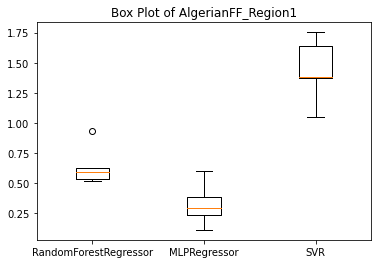

In [8]:
plt.boxplot([random_forest_val_mae, mlp_val_mae, svr_val_mae], labels=[model.__class__.__name__ for model in [random_forest, mlp, svr]])
plt.title('Box Plot of AlgerianFF_Region1')
plt.show()

# Task 1.1 of AlgerianFF_Region2

# Data preparation of AlgerianFF_Region2

In [9]:
data_2 = pd.read_csv(DATA_PATH_2) #read csv
data_2.columns = [x.strip() for x in data_2.columns]
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 12.5 KB


In [10]:
X, y = data_2[FEATRURE_COLUMNS], data_2[TARGET_COLUMN]
X, y = X.values, y.values
X.shape, y.shape

((122, 9), (122,))

# Preprocess data of AlgerianFF_Region2

In [11]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=RANDOM_STATE, train_size=TRAIN_RATIO)

# Task 1.2 of AlgerianFF_Region2

# Regression of AlgerianFF_Region2

In [12]:
model = RandomForestRegressor() #Random Forest of AlgerianFF_Region2
random_forest, random_forest_val_mae, random_forest_test_mae = train(model, N_SPLITS, X_train, X_test, y_train, y_test)
model = MLPRegressor(hidden_layer_sizes=[20, 30], max_iter=3000) #Neural Network of AlgerianFF_Region2
mlp, mlp_val_mae, mlp_test_mae = train(model, N_SPLITS, X_train, X_test, y_train, y_test)
model = SVR() #SVR of AlgerianFF_Region2
svr, svr_val_mae, svr_test_mae = train(model, N_SPLITS, X_train, X_test, y_train, y_test)

Training RandomForestRegressor ...
Model: RandomForestRegressor, Val Mean MAE: 0.9596, Test MAE: 0.6454
Training MLPRegressor ...
Model: MLPRegressor, Val Mean MAE: 0.7042, Test MAE: 0.6528
Training SVR ...
Model: SVR, Val Mean MAE: 2.7869, Test MAE: 1.7491


# Task 1.3 of AlgerianFF_Region2

# Box plot of AlgerianFF_Region2

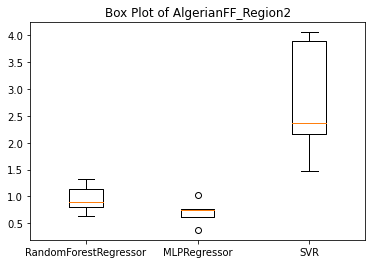

In [13]:
plt.boxplot([random_forest_val_mae, mlp_val_mae, svr_val_mae], labels=[model.__class__.__name__ for model in [random_forest, mlp, svr]])
plt.title('Box Plot of AlgerianFF_Region2')
plt.show()

# Part 2

# Task 2.1

# Fitness function

In [14]:
def fitness(route, dist_matrix): #fitness function
    total_dist = 0
    pre = route[0]
    for cur in route[1:]:
        total_dist += dist_matrix[pre, cur]
        pre = cur
    return total_dist

In [15]:
temp_dist_matrix = np.array([[0, 2, 3], [2, 0, 4], [3, 4, 0]])
route = [0, 1, 2]
assert fitness(route, temp_dist_matrix) == 6

# Random solution

In [16]:
def random_solution(city_num): #random_solution
    return np.random.permutation(city_num)

In [17]:
random_solution(10)

array([7, 8, 5, 1, 9, 3, 6, 0, 4, 2])

# Task 2.2

# Swap mutation

In [18]:
def swap_mutation(route): #swap mutaiion
    child = route.copy()
    idx1, idx2 = np.random.choice(len(child), size=2, replace=False)
    child[idx2], child[idx1] = child[idx1], child[idx2]
    return child

In [19]:
route = np.arange(10)
child = swap_mutation(route)
print('Parent: ', route)
print('Child: ', child)

Parent:  [0 1 2 3 4 5 6 7 8 9]
Child:  [0 1 2 5 4 3 6 7 8 9]


# HillClimber

In [20]:
def hill_climber(dist_matrix, max_iter=1000): #hill_climber
    parent = random_solution(len(dist_matrix)) # random init
    parent_fitness = fitness(parent, dist_matrix)
    best_fitness = []
    for iter in range(max_iter):
        child = swap_mutation(parent)
        child_fitness = fitness(child, dist_matrix)
        if child_fitness < parent_fitness:
            parent = child
            parent_fitness = child_fitness

        best_fitness.append(parent_fitness)
    return parent, best_fitness

# Task 2.3

# Draw fitness line plot

In [21]:
def draw_fitness(fitness_list, title): #draw plot of average, maximun and minimun
    fitness_list = np.asarray(fitness_list)
    iterations = np.arange(1, fitness_list.shape[1] + 1)
    plt.plot(iterations, fitness_list.mean(axis=0),'-', label='average')
    plt.plot(iterations, fitness_list.max(axis=0),'--', label='maximum')
    plt.plot(iterations, fitness_list.min(axis=0),'-.', label='minimum')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.legend()
    plt.title(title)
    plt.show()

# Test with distances.csv

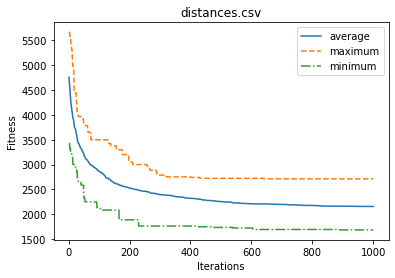

In [22]:
dist_matrix = np.loadtxt('./distances.csv',delimiter=',') #dist matrix of distances_short.csv
run_time = 30
fitness_list = []
for i in range(run_time):
    r, f = hill_climber(dist_matrix, max_iter=1000)
    fitness_list.append(f)
draw_fitness(fitness_list, 'distances.csv')

# Test with distances_short.csv

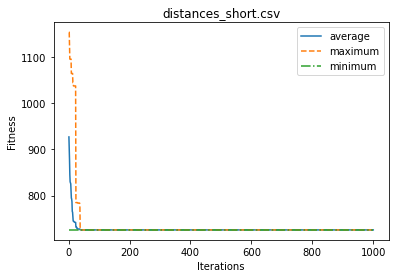

In [23]:
dist_matrix = np.loadtxt('./distances_short.csv',delimiter=',') #dist matrix of distances_short.csv
run_time = 30
fitness_list = []
for i in range(run_time):
    r, f = hill_climber(dist_matrix, max_iter=1000)
    fitness_list.append(f)
draw_fitness(fitness_list, 'distances_short.csv')

As can be seen from above two figures, When the number of cities increases, the range of maximum and minimum fitness becomes wider. Because the performance of the hill climber depends on the initial route, and cannot jump of the local optimal.

# Reference
numpy https://numpy.org/doc/stable/
pandas https://pandas.pydata.org/docs/user_guide/index.html#user-guide
matplotlib https://matplotlib.org/stable/contents.html
RandomForestRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
MLPRegressor https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
SVR https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
mean absolute error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
Standard Scaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
deep copy https://docs.python.org/3/library/copy.html